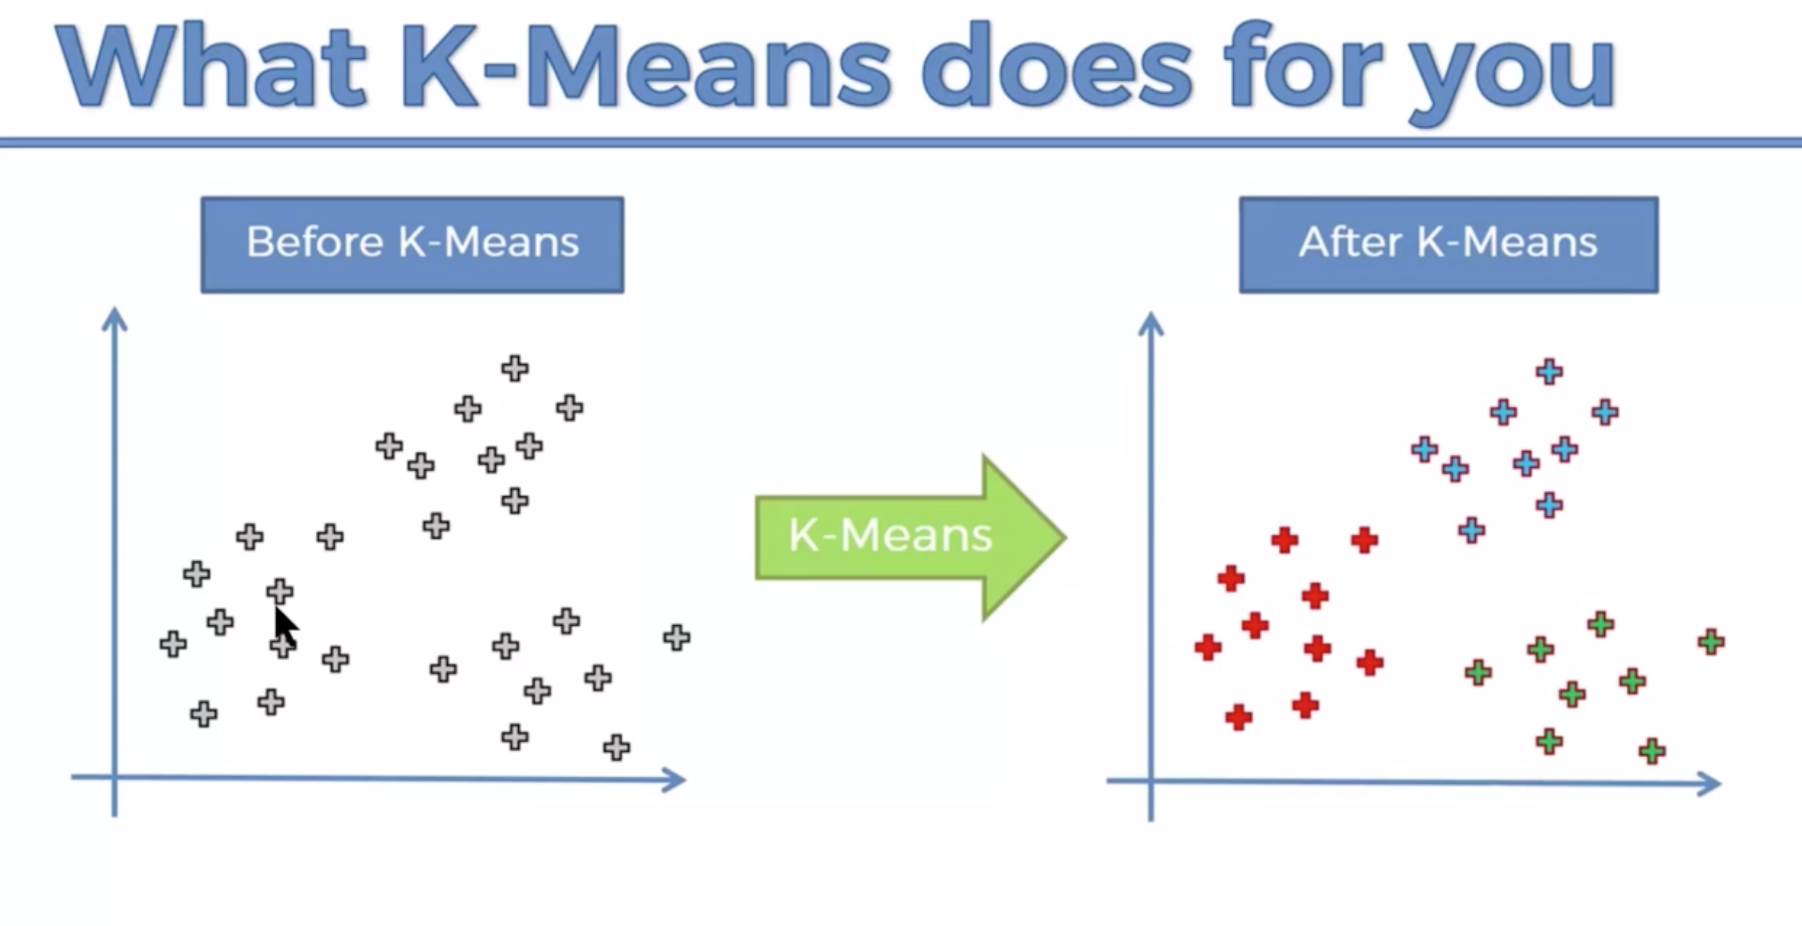

In [1]:
from IPython.display import Image
Image(filename='1.png')

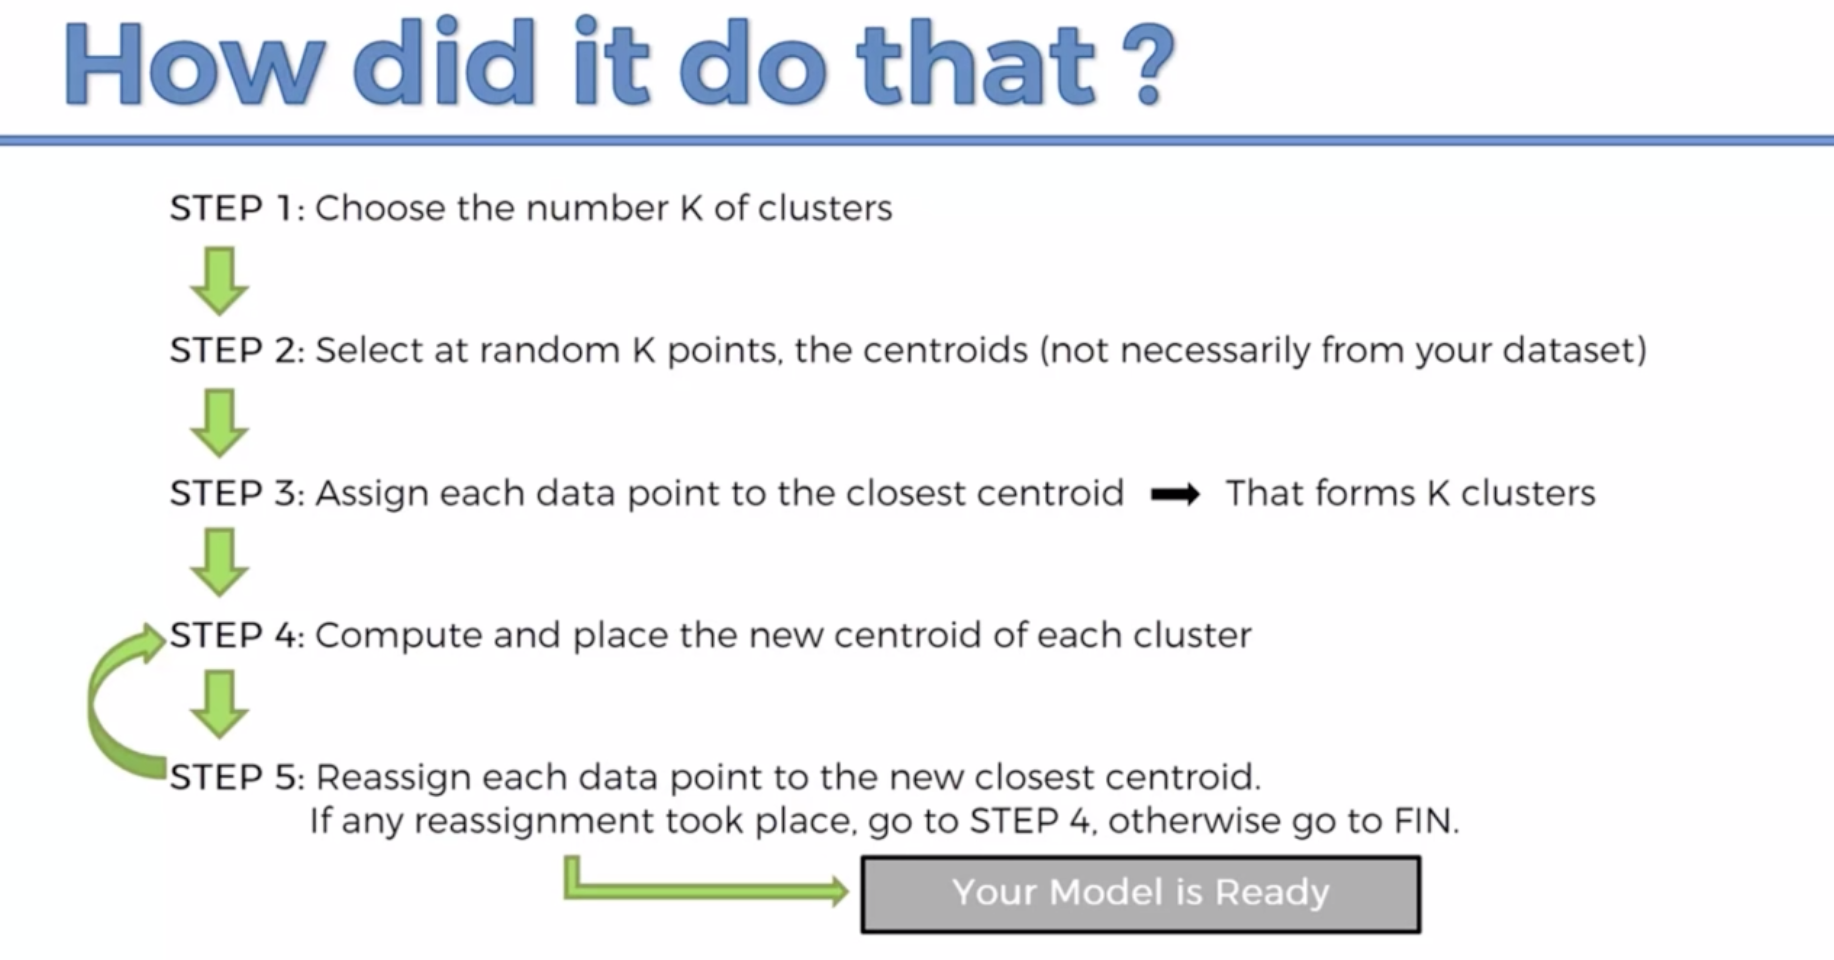

In [2]:
Image(filename='2.png')

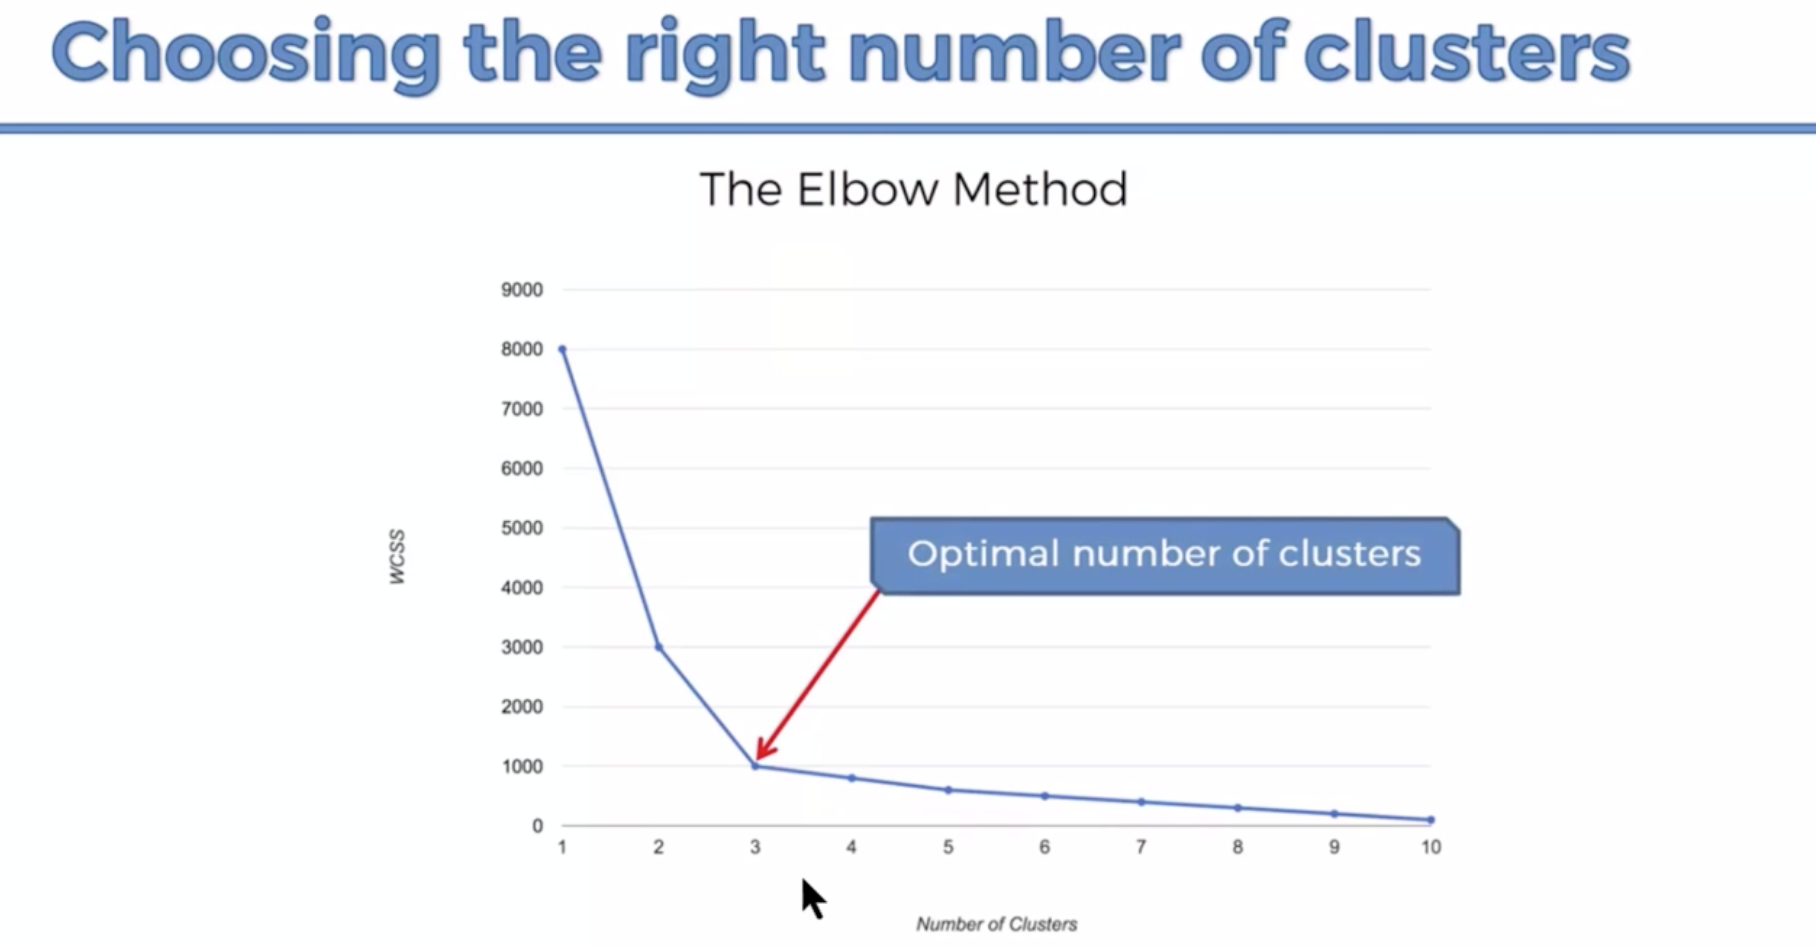

In [7]:
Image(filename='3.png')

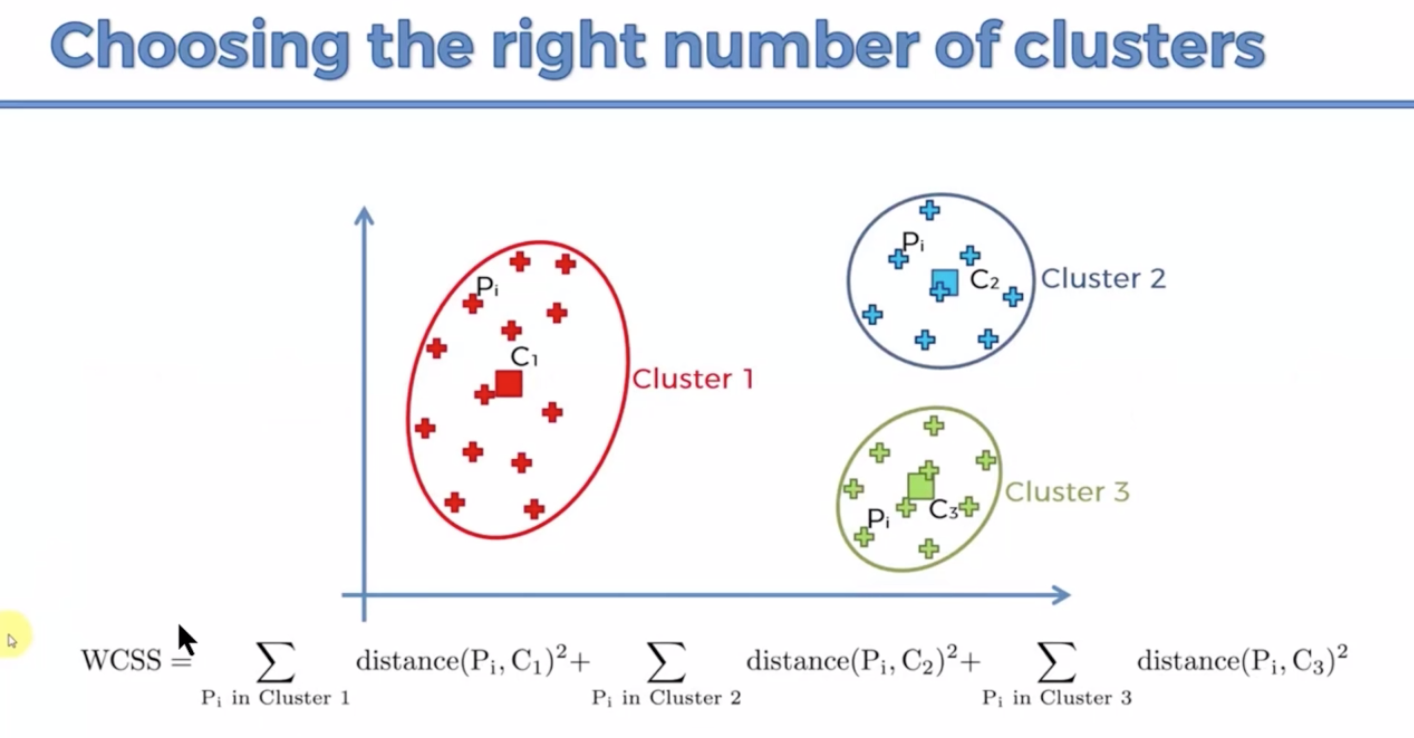

In [35]:
Image(filename='4.png')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
X = dataset.iloc[:,[3,4]].values

### Using the elbow method to find the optimal number of clusters

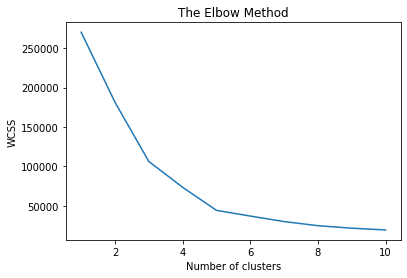

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i ,init= 'k-means++', random_state= 42 )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # sum square
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

* as we saw the best cluster so far is 5

## Fitting K-Means to the dataset

In [20]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans # [0:5]

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

## Visualising the clusters


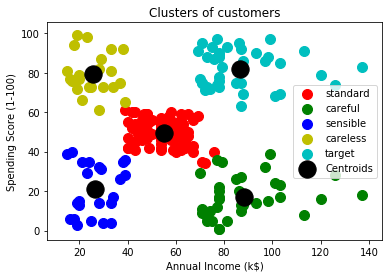

In [34]:
plt.scatter(X[y_kmeans == 0, 0] , X[y_kmeans == 0, 1] , s = 100 , c = 'r' , label = 'standard')
plt.scatter(X[y_kmeans == 1, 0] , X[y_kmeans == 1, 1] , s = 100 , c = 'g' , label = 'careful')
plt.scatter(X[y_kmeans == 2, 0] , X[y_kmeans == 2, 1] , s = 100 , c = 'b' , label = 'sensible')
plt.scatter(X[y_kmeans == 3, 0] , X[y_kmeans == 3, 1] , s = 100 , c = 'y' , label = 'careless')
plt.scatter(X[y_kmeans == 4, 0] , X[y_kmeans == 4, 1] , s = 100 , c = 'c' , label = 'target')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1] , s = 300 , c = 'black', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()